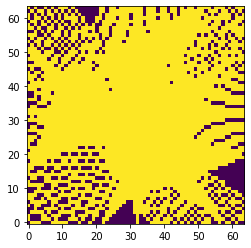

x0=0.6001502271054321 y0=0.5145789817470049 a=0.25727132292962485 b=0.48191663237279514 c=57.473264412150904
density (64, 64) projections (136,) (208,) (208,)


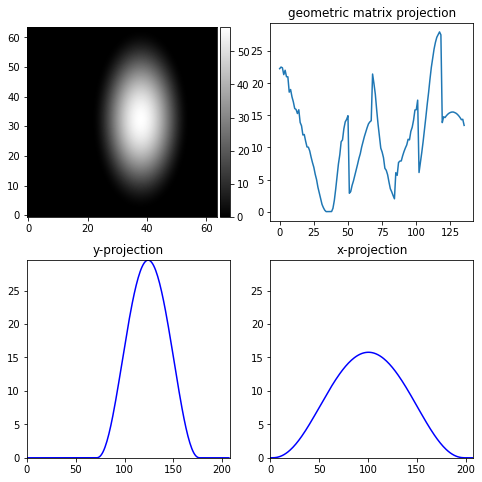

x0=0.6215090963921515 y0=0.11910016723031476 a=0.32829880000958617 b=0.11212366557133155 c=10.092387729252527
density (64, 64) projections (136,) (208,) (208,)


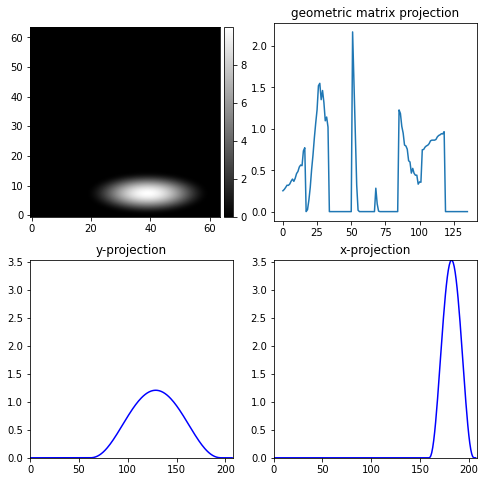

x0=0.5389055284227486 y0=0.5617051831933961 a=0.43573685085612274 b=0.3635457012595702 c=23.295703364385034
density (64, 64) projections (136,) (208,) (208,)


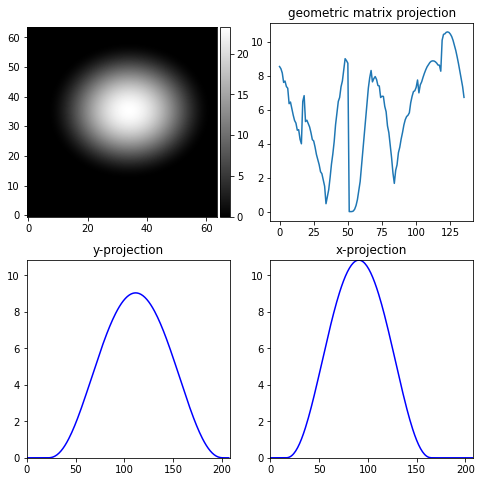

x0=0.4304424661906412 y0=0.5530802553527248 a=0.29898249222408624 b=0.09403153838192888 c=1.9686103771794028
density (64, 64) projections (136,) (208,) (208,)


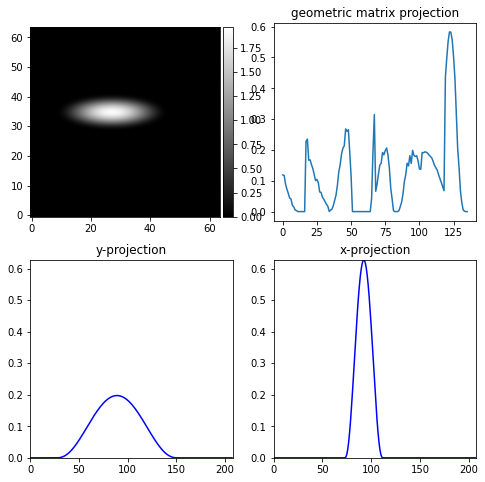

x0=0.7332047871816492 y0=0.8147006747042099 a=0.23863580056059175 b=0.11733997988235079 c=77.36508595996024
density (64, 64) projections (136,) (208,) (208,)


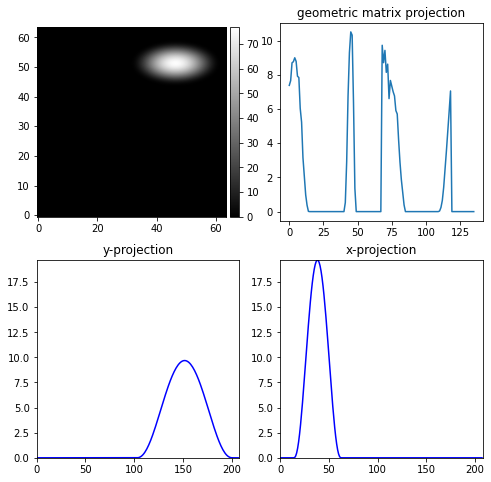

x0=0.517388461839938 y0=0.44456623988650656 a=0.37658201840968314 b=0.29132858158714764 c=60.570955930449536
density (64, 64) projections (136,) (208,) (208,)


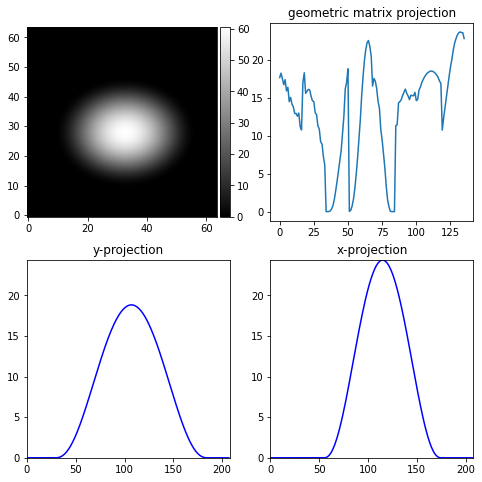

x0=0.43534467853054676 y0=0.45525112809329715 a=0.36251905943390883 b=0.20404668411007618 c=19.032200706040538
density (64, 64) projections (136,) (208,) (208,)


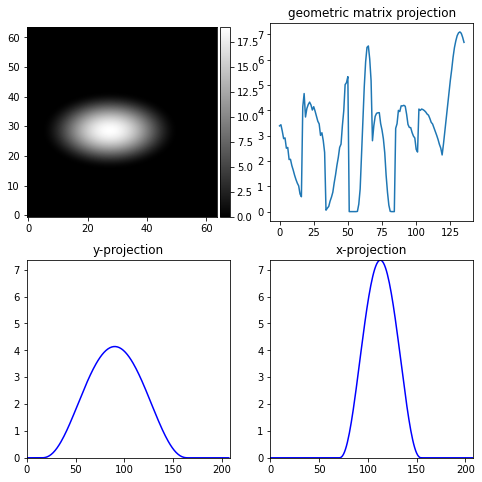

x0=0.6614198407291639 y0=0.46785337691094736 a=0.14964370257022316 b=0.24228252714345058 c=82.0007270053064
density (64, 64) projections (136,) (208,) (208,)


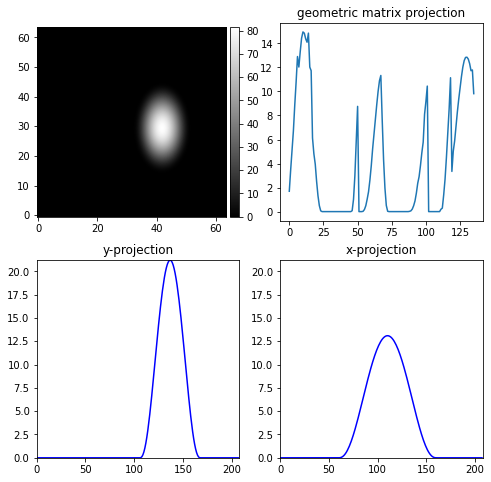

x0=0.45171649972449535 y0=0.8209206909366763 a=0.4504254491231724 b=0.05853462226094401 c=48.68843194861007
density (64, 64) projections (136,) (208,) (208,)


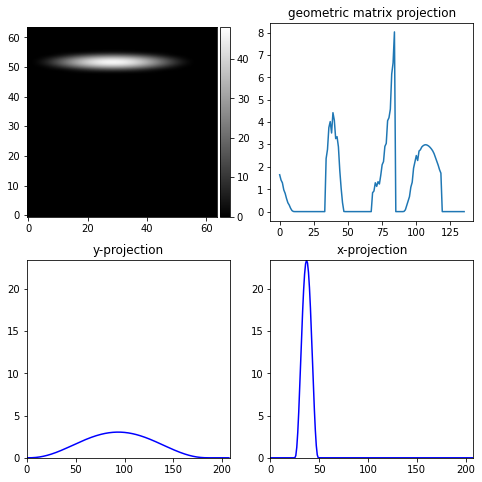

x0=0.34918577929509004 y0=0.5632184769858867 a=0.2718489057951329 b=0.3892791198114095 c=49.35030312692026
density (64, 64) projections (136,) (208,) (208,)


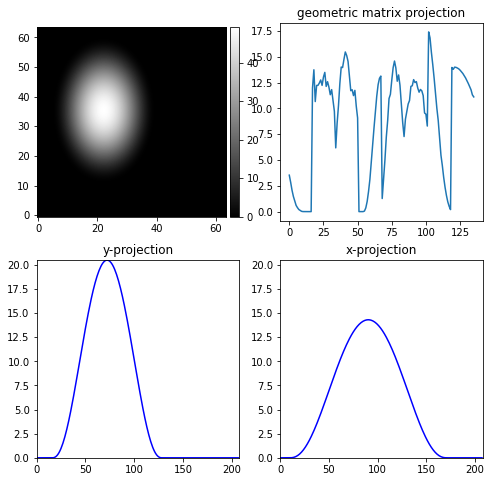

In [2]:
from create_data import create_ellipsis, geometric_matrix
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

num_ellipses = 10
S = 208
max_density = 100.
randomize_params = True
img_dims = [64,64]
noise_scale = 0.
geo_mat, geo_mat_plot = geometric_matrix(img_dims, 1)
    
plt.imshow(geo_mat_plot.T, origin='lower')
plt.show(block=False)
# exit(0)
for e in range(int(num_ellipses)):
    density, projection_geo_mat, Px, Py, ellipsis_args = create_ellipsis(S, max_density, img_dims, geo_mat, randomize_params, noise_scale)
    print('density', density.shape, 'projections', projection_geo_mat.shape, Px.shape, Py.shape)
    fig = plt.figure(figsize=(8,8),facecolor='w')
    
    ax = fig.add_subplot(221, aspect='equal')
    im = ax.imshow(np.transpose(density), cmap=plt.cm.gray, interpolation='bicubic', origin='lower')
    # ax.grid(False)
    # # ax.set_title(title)
    # cax = plt.axes([0.95, 0.05, 0.05,0.9 ])
    # fig.colorbar(im, ax=cax)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax) 
    
    
    ax_yp = fig.add_subplot(223)
    ax_yp.set_xlim(0, S)
    ax_yp.set_ylim(0.0, np.max([Px, Py]))
    ax_yp.set_title('y-projection')
    ax_yp.plot(np.arange(S), Py, 'b')
    
    ax_xp = fig.add_subplot(224)
    ax_xp.set_ylim(0.0, np.max([Px, Py]))
    ax_xp.set_xlim(0, S)
    ax_xp.set_title('x-projection')
    # ax_xp.plot(Px, np.arange(S+1), 'b')
    ax_xp.plot(np.arange(S), Px[::-1], 'b')
    
    ax_proj = fig.add_subplot(222)
    ax_proj.plot(np.arange(len(projection_geo_mat)), projection_geo_mat[::-1])
    ax_proj.set_title('geometric matrix projection')
    plt.show()

